# **import the data.**

In [20]:
%%bash
wget -nv -O data.csv 'https://drive.google.com/uc?export=download&id=1Kc1YjO_3OECANDBfatXKdk8GZCbL_44p'

2022-07-15 22:08:01 URL:https://doc-10-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2joakm2bk7edjfste5to9lb6fdigb4rf/1657922850000/06194299299598647526/*/1Kc1YjO_3OECANDBfatXKdk8GZCbL_44p?e=download&uuid=dbbbcf1b-a061-45c7-bc49-27e8cb0c5ba6 [102555/102555] -> "data.csv" [1]


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd

In [22]:
df = pd.read_csv('/content/data.csv')
df.head()

,PMC_ID,PMC_Year,Journal,Article Title,Secondary analysis,Data availability statement (yes/no),Data availability (yes/no),"If Data availability = yes, where do they share data? (SRA/GEO/other)","If other database, specifiy which one",Code availability statement (Yes/No),...,"If yes, notebook/Rmd","If yes, single/ multiple",Summary data (yes/ no/ partial),Number of citations,Gender of the PI,"Experience of PI/ Last author (Check their profile or webpage to see whether they are an associate/ assistant/ professor/ professor emiretus, etc)",PI/ last author's training background - CS/ Bioinformatics/ Other,PI (last author's) education level - PhD/PostDoc/ Master's etc,First author's education level,First author's training background (CS/ Bioinformatics/ Other)
0,PMC5048069,2016,Bioinformatics,PEP_scaffolder: using (homologous) proteins to...,no,no,no,NaN,NaN,Yes,...,Can't tell,Can't tell,Can't tell,11,NaN,Assistant Professor,NaN,NaN,NaN,NaN
1,PMC5254078,2016,Bioinformatics,FoldAtlas: a repository for genome-wide RNA st...,no,yes,yes,SRA,NaN,Yes,...,NaN,NaN,No,12,Female,Group Leader,Other,PostDoc,NaN,NaN
2,PMC4908329,2016,Bioinformatics,A convex optimization approach for identificat...,yes,NaN,NaN,NaN,NaN,Yes,...,Can't tell,Can't tell,Can't tell,12,Male,Professor,CS,Phd,Phd,CS
3,PMC4908319,2016,Bioinformatics,Privacy-preserving microbiome analysis using s...,yes,NaN,NaN,NaN,NaN,Yes,...,Can't tell,Can't tell,Can't tell,18,Male,Professor,Cs,Phd,NaN,NaN
4,PMC4920110,2016,Bioinformatics,Phasing for medical sequencing using rare vari...,yes,NaN,NaN,NaN,NaN,Yes,...,Can't tell,Can't tell,Can't tell,19,Male,Director,Other,Phd,Phd,Other Machine Learning


# **Convert Yes, No, etc. to integer values.**

In [23]:
df_toInts = df
conversions = {'yes': 1,
               'no': 0,
               'No (Available upon request)': 0,
               'Yes': 1,
               'No': 0,
               'No (Link Expired)': 0, 
               'No (Link expired)': 0,
               'No ': 0,
               'No (No access on BitBucket)': 0,
               'No (Cannot find the code)': 0,
               'No (link does Not work)':0,
               'No (available upon request)':0,
}

for key,value in conversions.items():
  df_toInts = df_toInts.replace(key, value)

df_toInts = df_toInts.fillna(0)

# **Convert journals names to standard format.**

In [24]:
df_toInts
conversions = {'BMC_Bioinformatics': 'BMC Bioinformatics',
               'Genome_Biol': 'Genome Biology',
               'Genome_Med': 'Genome Medicine',
               'Nat_Biotechnol': 'Nature Biotechnology',
               'Nat_Genet': 'Nature Genetics',
               'Nat_Methods': 'Nature Methods',
               'Nucleic_Acids_Res': 'Nucleic Acids Research'
              }

for key,value in conversions.items():
  df_toInts = df_toInts.replace(key, value)

##**Covert code repository names to standard format.**

In [ ]:
df_toInts
conversions = {'10xGenomics':'Other',
              'BitBucket':'Bitbucket',
              'GitHub, Supplementary' : 'GitHub',
              'Gitlab':'GitLab',
              'Other (BitBucket)':'Bitbucket',
              'Other (Bitbucket)':'Bitbucket',
              'Other (Sourceforge)':'Other',
              'Other (Website)':'Other',
              'Other(Sourceforge)':'Other',
              'Other(Website)':'Other',
              'Other(Website), GitHub':'GitHub',
              'Others (Website)':'Other',
              'Others(Supplementary)':'Supplementary Code',
              'Supplementary':'Supplementary Code',
              'Zenodo/GitHub':'GitHub + Zenodo',
              'downloadable file':'Other',
              'girthub':'GitHub',
              'gitlab':'GitLab',
              'gitub':'GitHub'}

for key,value in conversions.items():
  df_toInts = df_toInts.replace(key, value)

In [ ]:
def addSideValueLabel(xList, yList, position, buffer):
    for i in range(0, len(xList)):
        plt.text(yList[i] + buffer, i, "{:.2f}%".format(yList[i]), ha = position)

In [ ]:
def addTopValueLabel(xList, yList, position, buffer):
    for i in range(0, len(xList)):
        plt.text(i, yList[i] + buffer, "{:.2f}%".format(yList[i]), ha = position)

# **Data availability**

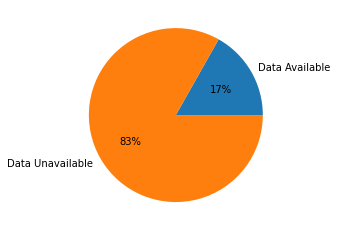

In [ ]:
countsAvailable = df_toInts['Data availability (yes/no)'].values.sum()
countsTotal = len(df)

dataframe = pd.DataFrame({'Name':['Data Available','Data Unavailable'],'':[countsAvailable,countsTotal]})
axes = dataframe.groupby(['Name']).sum().plot(kind='pie', y='',autopct='%1.0f%%')
axes.get_legend().remove()

# **Data availability by repository**

In [25]:
data_repositoryColumn = df_toInts['If Data availability = yes, where do they share data? (SRA/GEO/other)']
allRepositories = data_repositoryColumn.values.tolist()

# Remove NaN/0's 
allRepositories = list(filter(lambda allRepositories: allRepositories != 0, allRepositories))
uniqueRepositories = set(allRepositories)
totalAvailableData = len(allRepositories)

percentAvailable = {}
for repo in uniqueRepositories:
  percentAvailable[repo] = allRepositories.count(repo)/totalAvailableData * 100

data={'Data Repository':percentAvailable.keys(),'Percentage':percentAvailable.values()}
dataframe=pd.DataFrame(data=data)
dataframe

,Data Repository,Percentage
0,GEO,40.206186
1,other,48.453608
2,SRA,11.340206


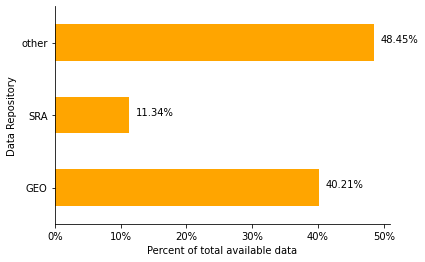

In [ ]:
axes= dataframe.plot.barh(color='orange',x='Data Repository',y='Percentage')
axes.set_xlabel('Percent of total available data')

axes.get_legend().remove()
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=100, decimals = 0))

addSideValueLabel(list(percentAvailable.keys()), list(percentAvailable.values()), "left", buffer = 1)

# **Data sharing by journal**

In [ ]:
dfGroupedJournals = df_toInts[['Journal','Data availability (yes/no)']]
dfGroupedJournals = dfGroupedJournals.groupby('Journal').mean()
dfGroupedJournals['Data availability (yes/no)'] = [n * 100 for n in dfGroupedJournals['Data availability (yes/no)']]
dfGroupedJournals = dfGroupedJournals.reset_index()
dfGroupedJournals

,Journal,Data availability (yes/no)
0,BMC Bioinformatics,3.333333
1,Bioinformatics,5.000000
2,Genome Biology,28.333333
3,Genome Medicine,20.000000
4,Nature Biotechnology,28.333333
5,Nature Genetics,30.000000
6,Nature Methods,25.000000
7,Nucleic Acids Research,21.666667


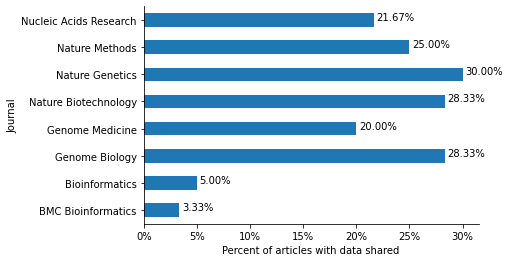

In [ ]:
axes = dfGroupedJournals.plot(kind='barh', ylabel='Journal')

axes.get_legend().remove()
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
axes.set_yticklabels(dfGroupedJournals['Journal'])

plt.xlabel('Percent of articles with data shared')
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=100, decimals = 0))

addSideValueLabel(list(dfGroupedJournals['Journal']), list(dfGroupedJournals['Data availability (yes/no)']), "left", buffer=0.25 )

# **Yearly trend of sharing data**

In [ ]:
dfDataSharingTrend = df_toInts[['PMC_Year','Data availability (yes/no)']]
dfDataSharingTrend = dfDataSharingTrend.groupby('PMC_Year').mean()
dfDataSharingTrend['Data availability (yes/no)'] = [n * 100 for n in dfDataSharingTrend['Data availability (yes/no)']]
dfDataSharingTrend = dfDataSharingTrend.reset_index()
dfDataSharingTrend

,PMC_Year,Data availability (yes/no)
0,2016,22.50
1,2017,32.50
2,2018,25.00
3,2019,7.50
4,2020,16.25
5,2021,17.50


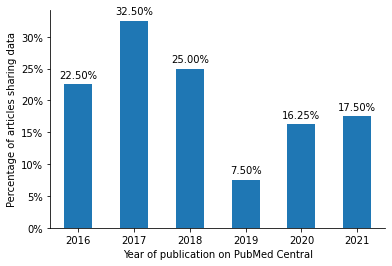

In [ ]:
axes = dfDataSharingTrend['Data availability (yes/no)'].plot(kind='bar', xlabel='Year of publication on PubMed Central',
                              ylabel='Percentage of articles sharing data')

axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
axes.set_xticklabels(dfDataSharingTrend['PMC_Year'])

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100, decimals = 0))
plt.xticks(rotation = 0)

addTopValueLabel(list(dfDataSharingTrend['PMC_Year']), list(dfDataSharingTrend['Data availability (yes/no)']), "center", buffer=1  )

plt.show()